In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,gradient_boosting
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore

I am importing the all library which I required for EDA, 
visualization, prediction and finding all matrices. 
The reason of doing this is that it become easier to 
use all the import statement at one go and we do not 
require to import the statement again at each point.

In [116]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [117]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [118]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [119]:
df.shape

(16468, 13)

In [120]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [121]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

most of the column are of same data type that is float and Date,
type and region is of object data type.

Above I am checking the null values, as find there are no null 
values in the data set because the red color is distributed
equally correspond to each column.

<AxesSubplot:>

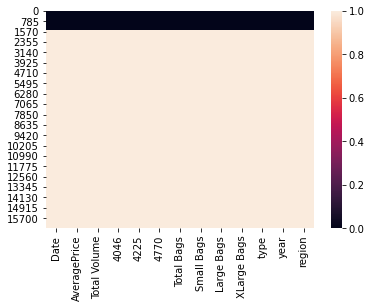

In [122]:
sns.heatmap(df.isnull())

the balck color which the null value

By using  mean ,i am checking the nan value in the columns

In [ ]:
df.isnull().mean()*100

by using ffill i ma filing nan value with mean

In [124]:
df_new=df.fillna(method='ffill')

In [125]:
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.0,conventional,2016.0,Charlotte
16464,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.0,conventional,2016.0,Charlotte
16465,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.0,conventional,2016.0,Charlotte
16466,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.0,conventional,2016.0,Charlotte


<AxesSubplot:>

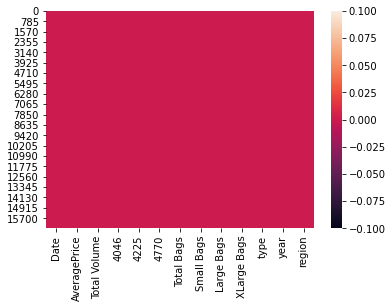

In [126]:
sns.heatmap(df_new.isnull())

In [127]:
#plt.figure(figsize=(10,6))
#sns.heatmap(df_new.corr(),annot=True)

In [128]:
df_new.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [129]:
df_new.shape

(16468, 13)

In [130]:
df_new.groupby('year')['type'].value_counts()

year    type        
2015.0  conventional     1270
2016.0  conventional    15198
Name: type, dtype: int64

In [131]:
df_new.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,16468.000000,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,16468.000000,16468.000000
mean,1.397297,3.136847e+05,9.869328e+04,1.055257e+05,1.968133e+04,8.978440e+04,7.507999e+04,1.450343e+04,200.980491,2015.922881
std,0.117583,1.406298e+06,6.161629e+05,5.325597e+05,4.293574e+04,2.389725e+05,2.040992e+05,3.697184e+04,2348.549525,0.266789
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,1.430000,1.829783e+05,4.311641e+04,5.419342e+04,1.656391e+04,6.910456e+04,5.745621e+04,1.164835e+04,0.000000,2016.000000
50%,1.430000,1.829783e+05,4.311641e+04,5.419342e+04,1.656391e+04,6.910456e+04,5.745621e+04,1.164835e+04,0.000000,2016.000000
75%,1.430000,1.829783e+05,4.311641e+04,5.419342e+04,1.656391e+04,6.910456e+04,5.745621e+04,1.164835e+04,0.000000,2016.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


statistics data show that their multiple outliers mostly in
XLargeBags There is also difference between mean and 50% value 
in some of the columns which used to get fix for better
prediction

Also, number of rows in each column are same, means there are no 
null values in the data set

Also, number of rows in each column are same, means there are no
null values in the data set

the column statistics data are near to 0 values

By checking the difference between the 75% and max value there 
are outliers in some of the column, I will check it soon.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

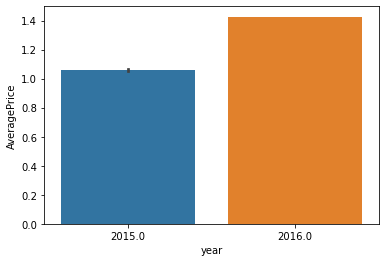

In [132]:
sns.barplot(x='year',y='AveragePrice',data=df_new)

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

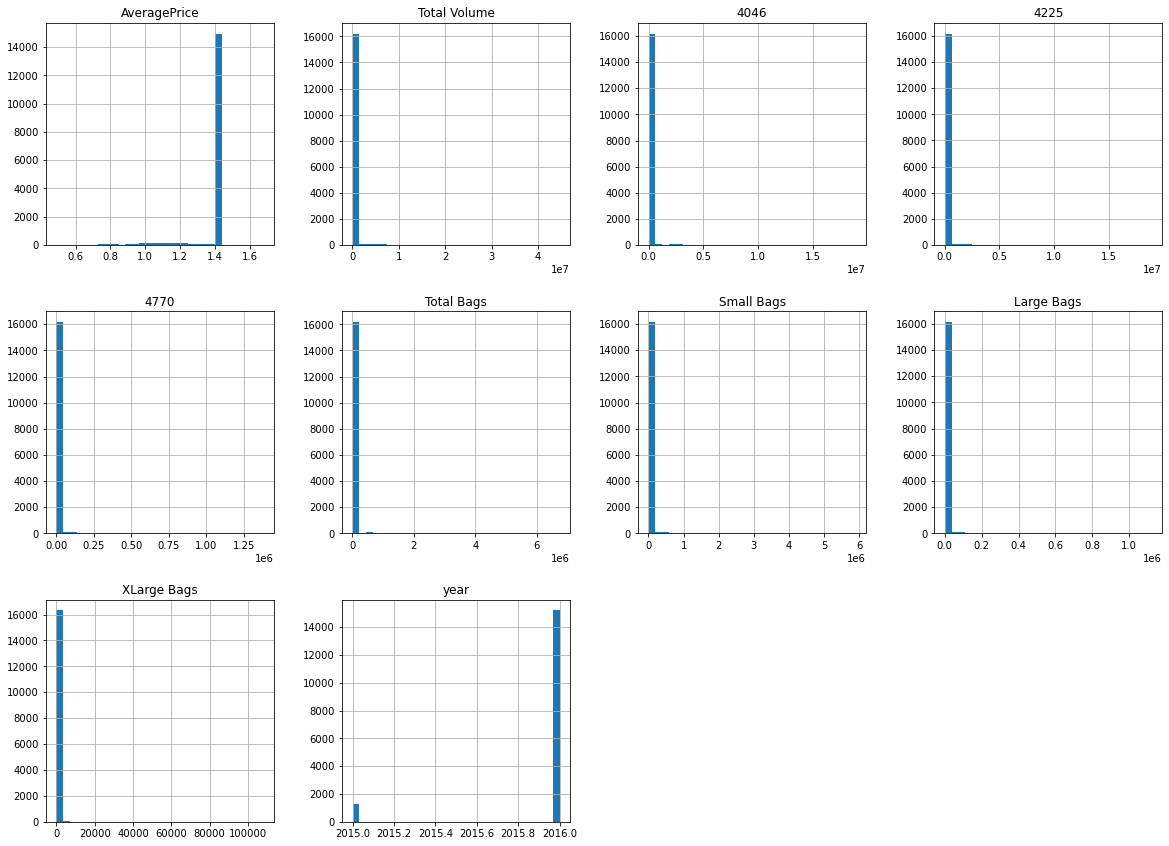

In [133]:
df_new.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

the data are not much varying in term of numbers, so they are
almost left skewed data

To make the column as normal distributed we can use different 
methods, but I am using numPy log to make the skew values as
normal distributed.

In [134]:
df_new.skew()

AveragePrice    -3.873727
Total Volume    20.443936
4046            20.091486
4225            20.894189
4770            18.493166
Total Bags      18.172599
Small Bags      18.143197
Large Bags      17.653413
XLarge Bags     19.392479
year            -3.170540
dtype: float64

In [135]:
skew=('AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year')
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

best skew value for normally distributes is very close to zero, 
so we are using “log1p” method to make the skew value near to 
zero

In [136]:
s=(df_new.dtypes=="object")
obj_col=list(s[s].index)
print("catagorical varible")
print(obj_col)

catagorical varible
['Date', 'type', 'region']


In [137]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Date', 'type', 'region']
for val in list1:
    df_new[val]=le.fit_transform(df_new[val].astype(str))

In [138]:
df_new.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year            float64
region            int32
dtype: object

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

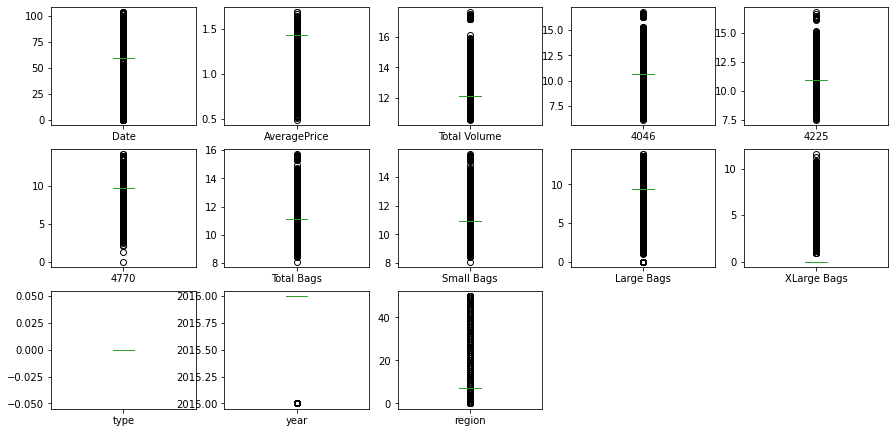

In [139]:
df_new.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [140]:

#upper = df_new.mean() + 3*df_new.std()
#lower = df_new.mean() -3*df_new.std()
#print(upper)
#print(lower)

In [141]:
#new_df= df[(df_new<upper) & (df_new>lower)]

In [142]:
#new_df.head()
#new_df.shape()

In [143]:
#z=np.abs(zscore(df))
#print(z)

In [144]:
df_new.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year            float64
region            int32
dtype: object

In [145]:
z = np.abs(zscore(df_new))
print(z)

[[3.58095033 0.57235459 2.22377892 ...        nan 3.45932495 1.30041371]
 [1.03611763 0.40225695 2.53371421 ...        nan 3.45932495 1.30041371]
 [1.50871507 3.97430738 1.0232799  ...        nan 3.45932495 1.30041371]
 ...
 [0.08180537 0.2781336  0.16356929 ...        nan 0.28907374 0.20470214]
 [0.08180537 0.2781336  0.16356929 ...        nan 0.28907374 0.20470214]
 [0.08180537 0.2781336  0.16356929 ...        nan 0.28907374 0.20470214]]


In [146]:
threshold= 3
print(np.where(z<3))
print(df_new)

(array([    0,     0,     0, ..., 16467, 16467, 16467], dtype=int64), array([ 1,  2,  4, ...,  9, 11, 12], dtype=int64))
       Date  AveragePrice  Total Volume       4046       4225      4770  \
0        92          1.33     11.070344   6.944801  10.905146  3.895080   
1        68          1.35     10.912867   6.515127  10.706381  4.083115   
2        44          0.93     11.680313   6.679222  11.600485  4.879007   
3        20          1.08     11.277116   7.032624  11.184108  4.298373   
4        98          1.28     10.840377   6.848515  10.688288  4.340944   
...     ...           ...           ...        ...        ...       ...   
16463    59          1.43     12.117128  10.671682  10.900333  9.715042   
16464    59          1.43     12.117128  10.671682  10.900333  9.715042   
16465    59          1.43     12.117128  10.671682  10.900333  9.715042   
16466    59          1.43     12.117128  10.671682  10.900333  9.715042   
16467    59          1.43     12.117128  10.671682  10

In [147]:
df_new1=df_new[(z<3).all(axis=1)]


In [148]:
print(df_new)
print(df_new1.shape)
#df_new=df_new1
print("shape after remove outliers",df_new1.shape)

       Date  AveragePrice  Total Volume       4046       4225      4770  \
0        92          1.33     11.070344   6.944801  10.905146  3.895080   
1        68          1.35     10.912867   6.515127  10.706381  4.083115   
2        44          0.93     11.680313   6.679222  11.600485  4.879007   
3        20          1.08     11.277116   7.032624  11.184108  4.298373   
4        98          1.28     10.840377   6.848515  10.688288  4.340944   
...     ...           ...           ...        ...        ...       ...   
16463    59          1.43     12.117128  10.671682  10.900333  9.715042   
16464    59          1.43     12.117128  10.671682  10.900333  9.715042   
16465    59          1.43     12.117128  10.671682  10.900333  9.715042   
16466    59          1.43     12.117128  10.671682  10.900333  9.715042   
16467    59          1.43     12.117128  10.671682  10.900333  9.715042   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type    year  region  
0        9.070833   

In [149]:
#threshold = 2
#print(np.where(z>2))
#print(df.shape)

In [150]:
#df_new1=df[(z<2).all(axis=1)]



In [151]:
#print(df_new.shape)
#print(df_new1)
#df_new=df_new1
#print('shape after removing Outliers:',df_new.shape)

In [152]:
df_new1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [153]:
df_new1.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveragePrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Small Bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Large Bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XLarge Bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[]

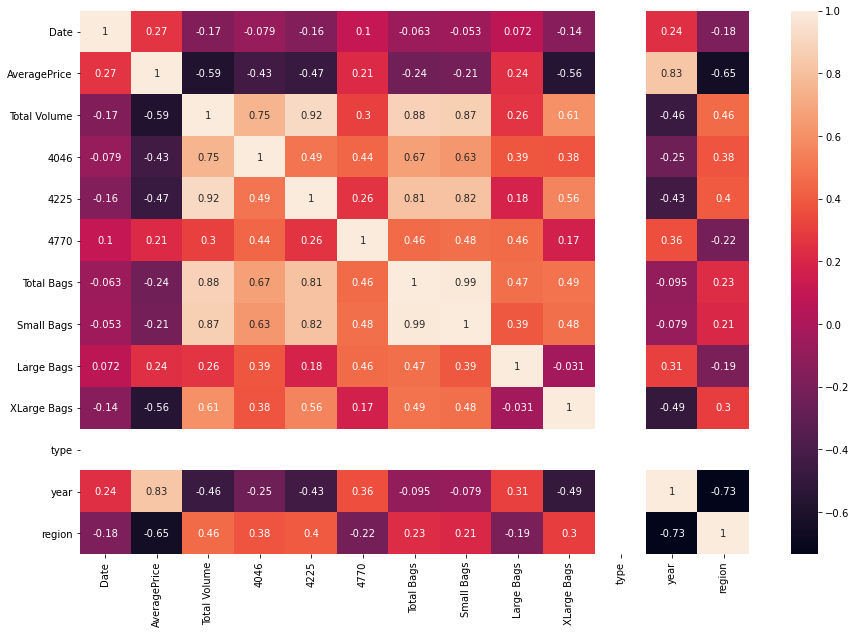

In [154]:
df_cor = df_new.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [155]:
X=df_new.iloc[:,1:14]
y=df_new['AveragePrice']

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [157]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [158]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5.080635365969056e-15
MSE: 9.14950189242791e-29
RMSE: 9.565302866312133e-15


In [159]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

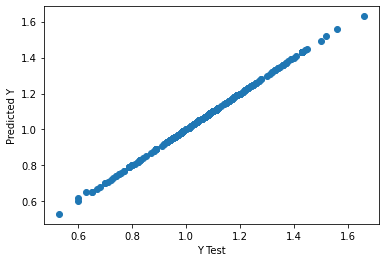

In [160]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [161]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.4286581849741217e-05
MSE: 5.46448087431695e-07
RMSE: 0.0007392212709545735


In [162]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [163]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.8202793086110285e-05
MSE: 4.044171220400915e-07
RMSE: 0.0006359379860018518


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

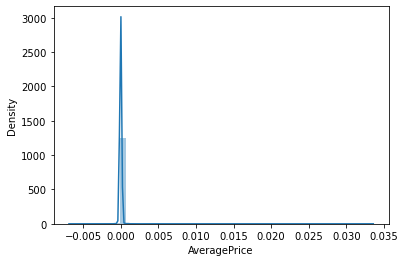

In [164]:
sns.distplot((y_test-pred),bins=50)

In [165]:
x_c=df_new.drop(columns=['region','Date'])
y_c=df[["region"]]

In [168]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

sc=StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [169]:
pred_prob = lr.predict_proba(x_c)[:,1]
pred_prob

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [170]:
fpr,tpr,thresholds = roc_curve(y_c,pred_prob,pos_label=True)

NameError: name 'pred_prob' is not defined

In [ ]:
print(fpr)
print("\n")
print(tpr)
print(thresholds)

In [ ]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'LinearRegression')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')
plt.title('linear regression')
plt.show()

In [171]:
import joblib
joblib.dump(lr,"avocadofinalDTC.pkl")

AttributeError: 'LinearRegression' object has no attribute 'cv_results_'